In [1]:
import glob

In [2]:
img_path=glob.glob('/home/ujjawal/Downloads/COLLETTION OF ALL/**/*')

In [3]:
img_path1=sorted(img_path)

In [5]:
len(img_path1)

2700

In [7]:
from PIL import Image
import numpy as np

In [8]:
img_list=[]
for i in range(len(img_path1)):
    img=Image.open(img_path1[i])
    img1=img.resize((64,64))
    arr=np.asarray(img1)
    img_list.append(arr)
    

In [9]:
X=np.asarray(img_list)

In [10]:
X.shape

(2700, 64, 64)

In [21]:
Y=np.zeros((2700,1))

In [22]:
Y

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [23]:
Y[:300]=0
Y[300:600]=1
Y[600:900]=2
Y[900:1200]=3
Y[1200:1500]=4
Y[1500:1800]=5
Y[1800:2100]=6
Y[2100:2400]=7
Y[2400:]=8

In [24]:
from keras.utils import np_utils

In [25]:
# convert class labels to on-hot encoding
num_classes=9
Y = np_utils.to_categorical(Y, num_classes)

In [29]:
Y.shape

(2700, 9)

In [30]:
from sklearn.utils import shuffle
from sklearn.cross_validation import train_test_split

/home/ujjawal/project/env1/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [38]:
#Shuffle the dataset
x,y = shuffle(X,Y, random_state=2)
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)


In [39]:
X_train=X_train.reshape((2160,64,64,1))
X_test=X_test.reshape((540,64,64,1))

In [40]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2160, 64, 64, 1)
(540, 64, 64, 1)
(2160, 9)
(540, 9)


In [43]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import SGD,RMSprop,adam


In [119]:
# Defining the model
input_shape=(64,64,1)
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))



In [120]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_37 (Conv2D)           (None, 62, 62, 32)        320       
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 60, 60, 64)        18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 30, 30, 64)        0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 30, 30, 64)        0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 57600)             0         
_________________________________________________________________
dense_18 (Dense)             (None, 128)               7372928   
_________________________________________________________________
dropout_15 (Dropout)         (None, 128)               0         
__________

In [122]:
import keras
#model.compile(loss='categorical_crossentropy', optimizer='rmsprop',metrics=["accuracy"])
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

#sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
#model.compile(loss='categorical_crossentropy', optimizer=sgd,metrics=["accuracy"])

In [123]:
num_epoch=100
# Training
hist = model.fit(X_train, y_train, batch_size=512, nb_epoch=num_epoch, verbose=2, validation_data=(X_test, y_test))

/home/ujjawal/project/env1/lib/python3.6/site-packages/keras/models.py:939: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 2160 samples, validate on 540 samples
Epoch 1/100
 - 1s - loss: 13.9438 - acc: 0.1231 - val_loss: 14.2675 - val_acc: 0.1148
Epoch 2/100
 - 0s - loss: 14.2396 - acc: 0.1139 - val_loss: 14.2675 - val_acc: 0.1148
Epoch 3/100
 - 1s - loss: 14.2499 - acc: 0.1148 - val_loss: 14.2675 - val_acc: 0.1148
Epoch 4/100
 - 0s - loss: 14.3214 - acc: 0.1102 - val_loss: 14.2675 - val_acc: 0.1148
Epoch 5/100
 - 0s - loss: 14.3603 - acc: 0.1083 - val_loss: 14.2675 - val_acc: 0.1148
Epoch 6/100
 - 0s - loss: 14.2972 - acc: 0.1130 - val_loss: 14.2675 - val_acc: 0.1148
Epoch 7/100
 - 0s - loss: 14.3497 - acc: 0.1093 - val_loss: 14.2675 - val_acc: 0.1148
Epoch 8/100
 - 0s - loss: 14.2716 - acc: 0.1139 - val_loss: 14.2675 - val_acc: 0.1148
Epoch 9/100
 - 0s - loss: 14.3365 - acc: 0.1097 - val_loss: 14.2675 - val_acc: 0.1148
Epoch 10/100
 - 0s - loss: 14.2993 - acc: 0.1125 - val_loss: 14.2675 - val_acc: 0.1148
Epoch 11/100
 - 0s - loss: 14.3355 - acc: 0.1093 - val_loss: 13.8826 - val_acc: 0.1241
Epoch

Epoch 97/100
 - 1s - loss: 0.0187 - acc: 0.9931 - val_loss: 0.3639 - val_acc: 0.9167
Epoch 98/100
 - 1s - loss: 0.0141 - acc: 0.9968 - val_loss: 0.3811 - val_acc: 0.9296
Epoch 99/100
 - 1s - loss: 0.0136 - acc: 0.9963 - val_loss: 0.3828 - val_acc: 0.9167
Epoch 100/100
 - 0s - loss: 0.0105 - acc: 0.9972 - val_loss: 0.3611 - val_acc: 0.9315


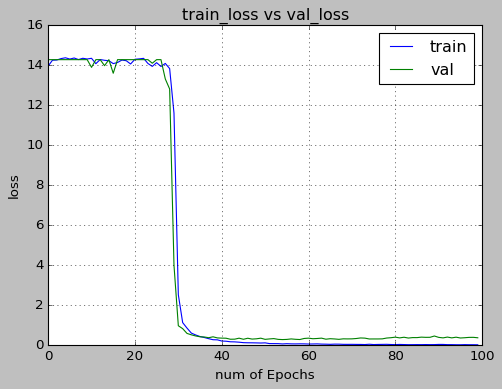

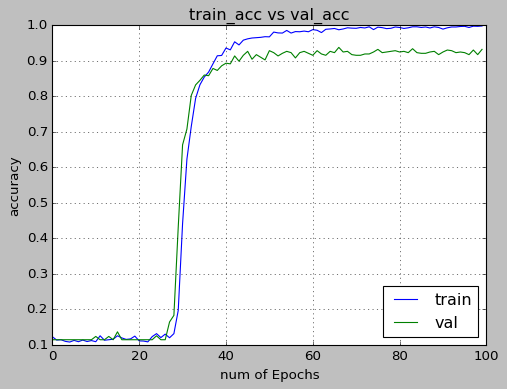

In [124]:
import matplotlib.pyplot as plt
# visualizing losses and accuracy
train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['acc']
val_acc=hist.history['val_acc']
xc=range(num_epoch)

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])


plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])
plt.show()

In [125]:
# Evaluating the model

score = model.evaluate(X_test, y_test,verbose=1)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

540/540 [==============================] - 0s 130us/step
Test Loss: 0.3611002641695517
Test accuracy: 0.9314814823645132


In [126]:
test_image = X_test[0:1]
print (test_image.shape)

print(model.predict(test_image))
print(model.predict_classes(test_image))
print(y_test[0:1])

(1, 64, 64, 1)
[[3.36762812e-10 1.26955895e-08 8.58902016e-09 2.50244530e-11
  6.57988997e-10 2.69689315e-09 1.55798291e-10 5.07190805e-07
  9.99999523e-01]]
[8]
[[0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [127]:
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk
